In [1]:
%load_ext autoreload
%autoreload 2

from cadet_imports import *

In [183]:
import my_cadet_utils as cad_utils
import parameter_correlations as corr

In [189]:
resin  = 'phq'
salt_c = 100.0
keq_vals, ds_vals = corr.get_column_params(resin, salt_c)

keq_vals[1] *= 1e-4

/home/chase/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [190]:
# corr.plot_keq('phq')

In [191]:
# corr.plot_ds('phq')

In [192]:
proteins = ['ADH', 'BLG', 'CAT', 'OVA']
dp_vals = [1e-11, 2.5e-11, 9.0e-12, 2.2e-11]

order  = 1e1
masses = [147, 37, 240, 43]
c_load = [order/masses[0], order/masses[1], order/masses[2], order/masses[3]]

cap_mg     = 100
q_m_fac    = cap_mg/(1.0-0.694)
# q_m_fac    = cap_mg

q_max_vals = np.array([q_m_fac/masses[i] for i in range(4)])
ka_vals    = [keq_vals[i]/q_max_vals[i] for i in range(len(q_max_vals))]

In [193]:

print(np.array(keq_vals))
print(np.array(ka_vals))
print(np.array(q_max_vals))
print(np.array(c_load))
print(np.array(dp_vals))
print(np.array(ds_vals))




[1.52404466e+00 6.16952761e+04 3.11185642e+01 3.78040453e+01]
[6.85545770e-01 6.98513916e+03 2.28534736e+01 4.97425629e+00]
[2.22311147 8.83236177 1.36165577 7.5999392 ]
[0.06802721 0.27027027 0.04166667 0.23255814]
[1.0e-11 2.5e-11 9.0e-12 2.2e-11]
[4.91081877e-12 2.51839403e-28 1.33236926e-14 1.04903347e-18]


In [194]:
bulk  = {}
solid = {}

for i in range(4):
    bulk[i], solid[i] = cad_utils.get_mcl_isotherm(ka_vals[i], q_max_vals[i])

Simulation completed successfully
Simulation completed successfully
Simulation completed successfully
Simulation completed successfully


In [195]:
image_folder = Path().absolute() / 'images'


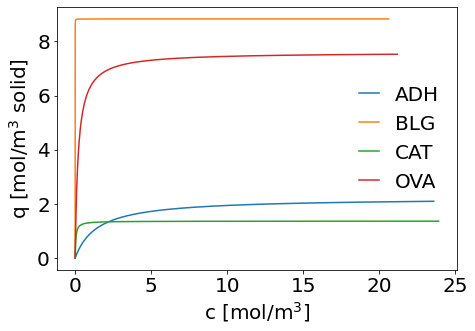

In [196]:
fig, ax = plt.subplots()
params  = {'font.weight':'normal', 'font.size':20, 'figure.autolayout':True}
plt.rcParams.update(params)
plt.xlabel('c [mol/m$^3$]')
plt.ylabel('q [mol/m$^3$ solid]')
fig.set_size_inches(7, 5, forward=True)
# ax.set_xlim(-0.1, 5)

for i in range(4):
    plt.plot(bulk[i][:, 1], solid[i][:, 1], label=proteins[i])

ax.legend(loc='best', frameon=False, handlelength=1.0)
# image_file = (image_folder / ('isotherms_si_units_4_orders.png')).as_posix()
# plt.savefig(image_file, dpi=300)

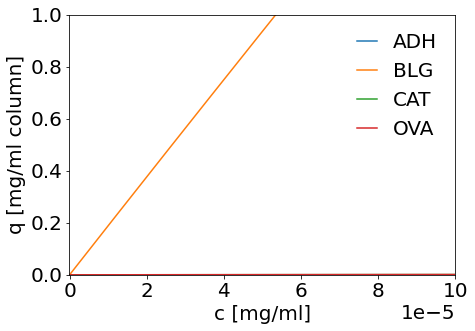

In [205]:
fig, ax = plt.subplots()
params  = {'font.weight':'normal', 'font.size':20, 'figure.autolayout':True}
plt.rcParams.update(params)
plt.xlabel('c [mg/ml]')
plt.ylabel('q [mg/ml column]')
fig.set_size_inches(7, 5, forward=True)
ax.set_xlim(-1e-7, 1e-4)
ax.set_ylim(-1e-7, 1e0)


for i in range(4):
    plt.plot(bulk[i][:, 1]*masses[i], solid[i][:, 1]*masses[i]*(1-0.694), label=proteins[i])

ax.legend(loc='best', frameon=False, handlelength=1.0)
# image_file = (image_folder / ('isotherms_common_units_4_orders.png')).as_posix()
image_file = (image_folder / ('isotherms_common_units.png')).as_posix()
plt.savefig(image_file, dpi=300)